In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
print("Исходные данные (train):")
train.head()

Исходные данные (train):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Оставляем только нужные столбцы
features = ['Pclass', 'Sex']
X = train[features].copy()
y = train['Survived'].copy()

In [5]:
X

,Pclass,Sex
0,3,male
1,1,female
2,3,female
3,1,female
4,3,male
...,...,...
886,2,male
887,1,female
888,3,female
889,1,male


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
# Кодируем Sex: female → 1, male → 0
X['Sex'] = X['Sex'].map({'female': 1, 'male': 0})

In [8]:
X['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [9]:
print("Типы данных:")
print(X.dtypes)

Типы данных:
Pclass    int64
Sex       int64
dtype: object


In [10]:
# Разделяем данные: 80% — обучение, 20% — валидация
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмеры выборок:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}, y_val: {y_val.shape}")


Размеры выборок:
X_train: (712, 2), y_train: (712,)
X_val:   (179, 2), y_val: (179,)


In [11]:
# Создаём и обучаем модель
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
# Предсказания на валидации
y_pred_log = log_reg.predict(X_val)

In [13]:
# Считаем точность
acc_log = accuracy_score(y_val, y_pred_log)
print(f"\nТочность логистической регрессии: {acc_log:.4f}")


Точность логистической регрессии: 0.7765


In [14]:
# Создаём и обучаем Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Предсказания
y_pred_rf = rf.predict(X_val)

In [16]:
# Точность
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Точность Random Forest: {acc_rf:.4f}")

Точность Random Forest: 0.7765


In [17]:
print("\nСравнение моделей:")
print(f"Логистическая регрессия: {acc_log:.4f}")
print(f"Random Forest:        {acc_rf:.4f}")

# Выбираем лучшую
if acc_log >= acc_rf:
    best_model = log_reg
    model_name = "Логистическая регрессия"
else:
    best_model = rf
    model_name = "Random Forest"

print(f"\nЛучшая модель: {model_name} с точностью {max(acc_log, acc_rf):.4f}")



Сравнение моделей:
Логистическая регрессия: 0.7765
Random Forest:        0.7765

Лучшая модель: Логистическая регрессия с точностью 0.7765


In [18]:
if model_name == "Random Forest":
    print("\nВажность признаков в Random Forest:")
    for feature, importance in zip(features, rf.feature_importances_):
        print(f"{feature}: {importance:.4f}")


In [19]:
# Обрабатываем test-данные (так же, как train)
X_test = test[features].copy()
X_test['Sex'] = X_test['Sex'].map({'female': 1, 'male': 0})

# Предсказываем
y_pred = best_model.predict(X_test)

# Сохраняем результат
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission_best.csv', index=False)
print("Файл submission_best.csv сохранён!")


Файл submission_best.csv сохранён!


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


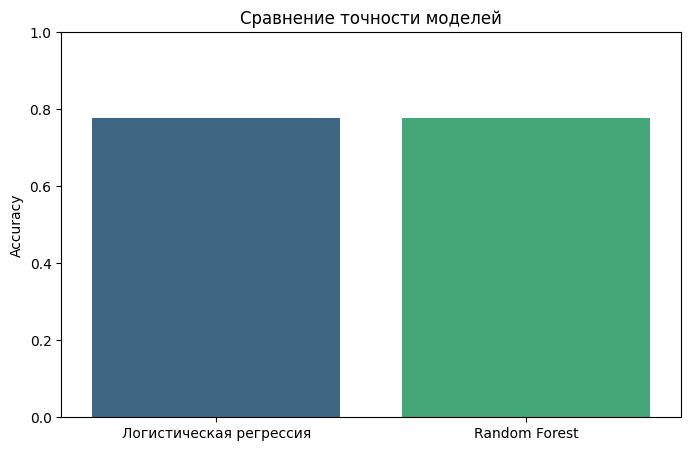

График показывает, какая модель точнее на валидационной выборке.


In [20]:
# Строим график сравнения моделей
models = ['Логистическая регрессия', 'Random Forest']
accuracies = [acc_log, acc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Сравнение точности моделей')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

print("График показывает, какая модель точнее на валидационной выборке.")
